In [1]:
from google.colab import files
uploaded = files.upload()

Saving weight-height.csv to weight-height.csv


**Linear Regression**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['weight-height.csv']))

In [4]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


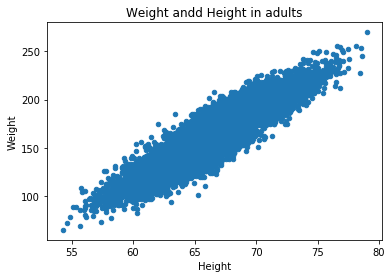

In [5]:
data.plot(kind='scatter',
         x = 'Height',
         y = 'Weight',
         title = 'Weight andd Height in adults')

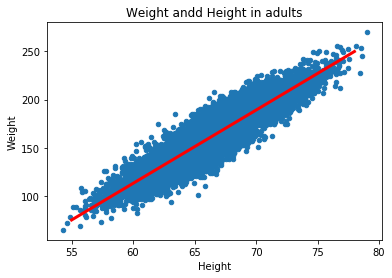

In [6]:
data.plot(kind='scatter',
         x = 'Height',
         y = 'Weight',
         title = 'Weight andd Height in adults')


# Here we will ploting the red line 'by hand' with fixed values
# we will try to learn this line with an algorithm below
plt.plot([55,78], [75,250], color='red', linewidth = 3)

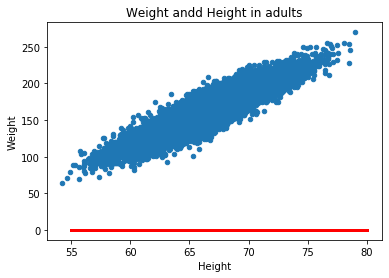

In [7]:
def line(x, w=0, b=0):
  return x*w+b

x = np.linspace(55, 80, 100)
yhat = line(x, w = 0, b = 0)

data.plot(kind='scatter',
         x = 'Height',
         y = 'Weight',
         title = 'Weight andd Height in adults')
plt.plot(x, yhat, color='red', linewidth = 3)

**Cost Function**

In [0]:
def mean_squared_error(y_true, y_pred):
  s = (y_true - y_pred)**2
  return s.mean()

In [0]:
x = data[['Height']].values
y_true = data['Weight'].values

In [10]:
y_pred = line(x)
mean_squared_error(y_true, y_pred)

27093.83757456164

Text(0.5, 1.0, 'Cost as a function of b')

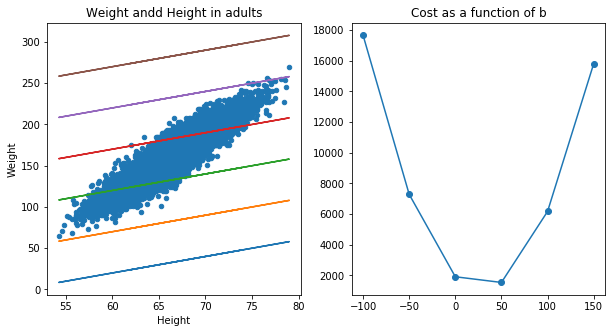

In [11]:
plt.figure(figsize=(10,5))

# We are going to draw 2 plots in the same figure
# first plot, data and a few lines

ax1 = plt.subplot(121)
data.plot(kind='scatter',
         x = 'Height',
         y = 'Weight',
         title = 'Weight andd Height in adults', ax = ax1)

# lets explore the cost function for a values of b between -100 to +150

bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []   # we will append the values of the cost here,

for b in bbs:
  y_pred = line(x, w=2, b=b)
  mse =mean_squared_error(y_true, y_pred)
  mses.append(mse)
  plt.plot(x, y_pred)

# Second plot : Cost Function

ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')

**Linear Regression with Keras**

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [13]:
model = Sequential()

In [14]:
model.add(Dense(1, input_shape=(1,)))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [17]:
model.fit(x, y_true, epochs=40)




Epoch 1/40





10000/10000 [==============================] - 1s 63us/step - loss: 1618.3355
Epoch 2/40
10000/10000 [==============================] - 0s 25us/step - loss: 567.5416
Epoch 3/40
10000/10000 [==============================] - 0s 25us/step - loss: 544.2194
Epoch 4/40
10000/10000 [==============================] - 0s 25us/step - loss: 507.6779
Epoch 5/40
10000/10000 [==============================] - 0s 25us/step - loss: 463.6066
Epoch 6/40
10000/10000 [==============================] - 0s 27us/step - loss: 424.1395
Epoch 7/40
10000/10000 [==============================] - 0s 25us/step - loss: 399.2793
Epoch 8/40
10000/10000 [==============================] - 0s 25us/step - loss: 364.5240
Epoch 9/40
10000/10000 [==============================] - 0s 24us/step - loss: 353.1573
Epoch 10/40
10000/10000 [==============================] - 0s 25us/step - loss: 305.9693
Epoch 11/40
10000/10000 [==============================] - 0s 27us/step - loss: 279.2288
Epoch 12/40
10000/100

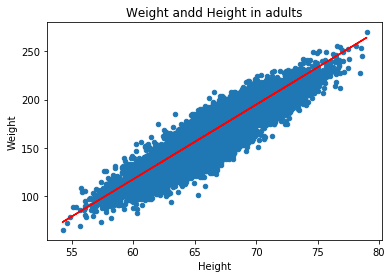

In [18]:
y_pred = model.predict(x)

data.plot(kind='scatter',
         x = 'Height',
         y = 'Weight',
         title = 'Weight andd Height in adults')
plt.plot(x, y_pred, color = 'red')

In [0]:
w, b = model.get_weights()

In [20]:
w

array([[7.749473]], dtype=float32)

In [21]:
b

array([-347.71487], dtype=float32)

**Training and Testing**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y_true, test_size=0.2)

In [26]:
x_train.shape

(8000, 1)

In [27]:
x_test.shape

(2000, 1)

In [28]:
y_train.shape

(8000,)

In [29]:
y_test.shape

(2000,)

In [0]:
w[0,0] = 0.0
b[0] = 0.0
model.set_weights((w,b))

In [31]:
model.fit(x_train, y_train, epochs=50, verbose=0)

In [0]:
y_train_pred = model.predict(x_train).ravel()
y_test_pred = model.predict(x_test).ravel()

In [0]:
from sklearn.metrics import mean_squared_error as mse

In [37]:
print("The mean square error on the train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The mean square error on the test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The mean square error on the train set is:	184.9
The mean square error on the test set is:	180.2


In [0]:
from sklearn.metrics import r2_score    

In [41]:
print("The R2 score on the Train set is:\t{:0.1f}".format(r2_score(y_test, y_test_pred)))
print("The R2 score on the test set is:\t{:0.1f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.8
The R2 score on the test set is:	0.8
